<a href="https://colab.research.google.com/github/believeNwamae/Data-Science/blob/main/uberTaxiPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a python Data Analytics Application

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

##Load Data

In [5]:
data = pd.read_csv('/content/Uber Drives - .csv')

In [6]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Checking for Missing Values

If a data is not available uses NaN to represent it

In [7]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [8]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

For this training all the missing values would be dropped

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [12]:
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format ='%m/%d/%Y %H:%M' )

<ipython-input-12-d52e816ca547>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format ='%m/%d/%Y %H:%M' )


In [13]:
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],format ='%m/%d/%Y %H:%M' )

<ipython-input-13-d19945c9652f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],format ='%m/%d/%Y %H:%M' )


In [14]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [15]:
hour = []
day = []
dayofweek= []
month=[]
weekday = []

for x in data['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])


data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

<ipython-input-15-11c236962d00>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR'] = hour
<ipython-input-15-11c236962d00>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY'] = day
<ipython-input-15-11c236962d00>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [16]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## Categories We have

In [17]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

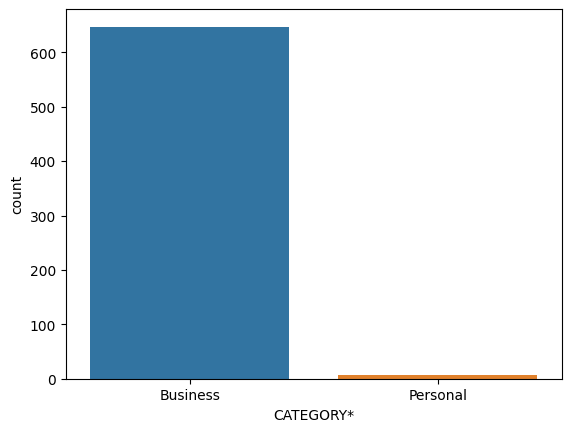

In [18]:
 sns.countplot(x='CATEGORY*',data=data)

##How long people travel 

<Axes: ylabel='Frequency'>

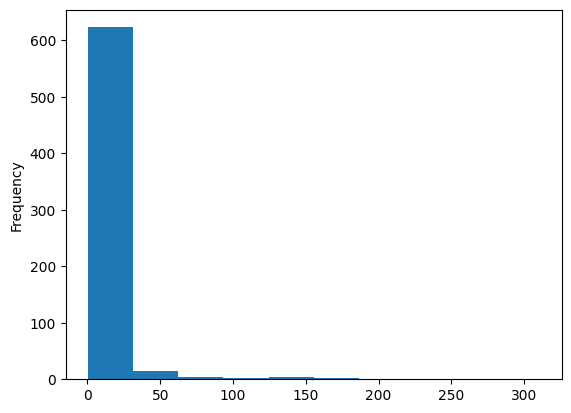

In [19]:
data['MILES*'].plot.hist()

## What Hour do most people book Uber to their destination 

Text(0.5, 1.0, 'Number of Trips vs Hours')

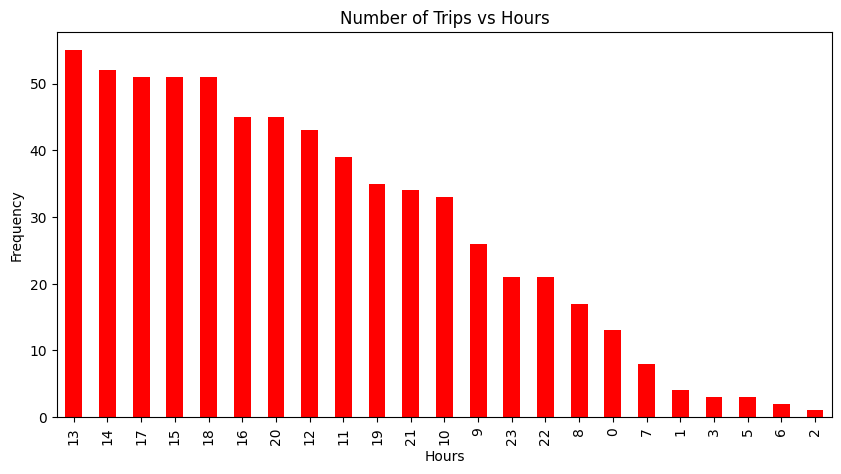

In [20]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind ='bar',color='red',figsize = (10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')

##Check the Purpose for the trips

<Axes: >

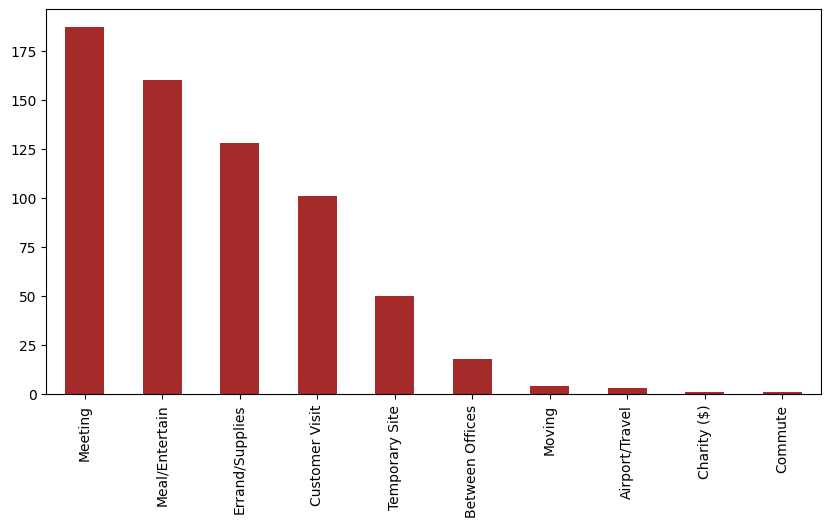

In [21]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5), color='brown')

##Which Days Has the Highest Number of Trips

<Axes: >

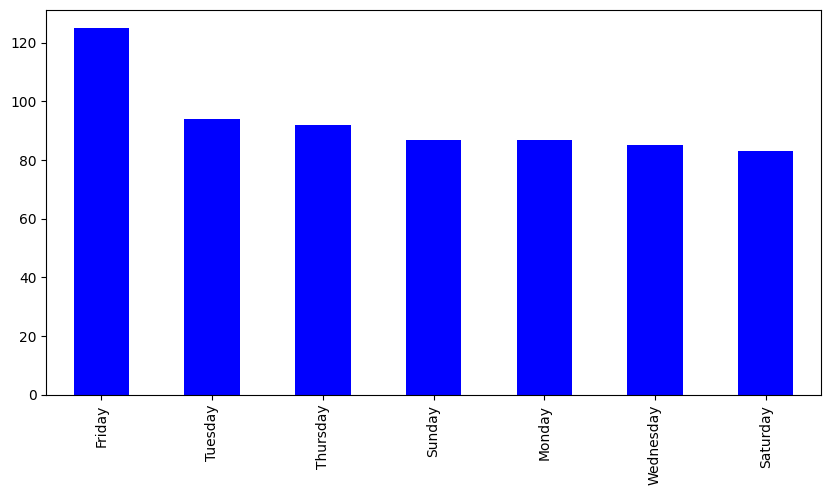

In [22]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5), color='blue')

What are the Number of trips per Day

<Axes: >

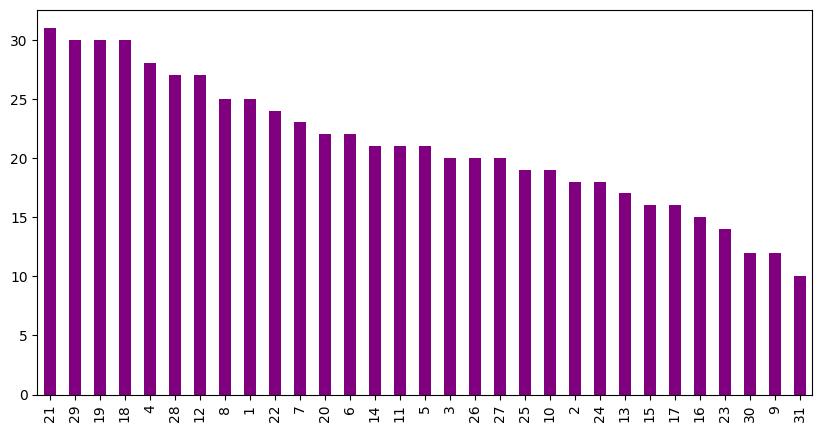

In [23]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5), color='PURPLE')

what are the trips in a month

<Axes: >

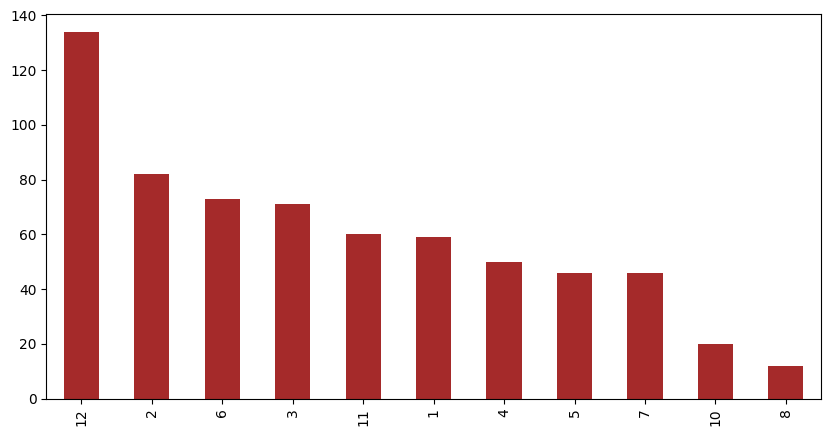

In [24]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5), color='brown')

##The starting point of trips. Where do People start Boarding Their Trip from the Most

<Axes: >

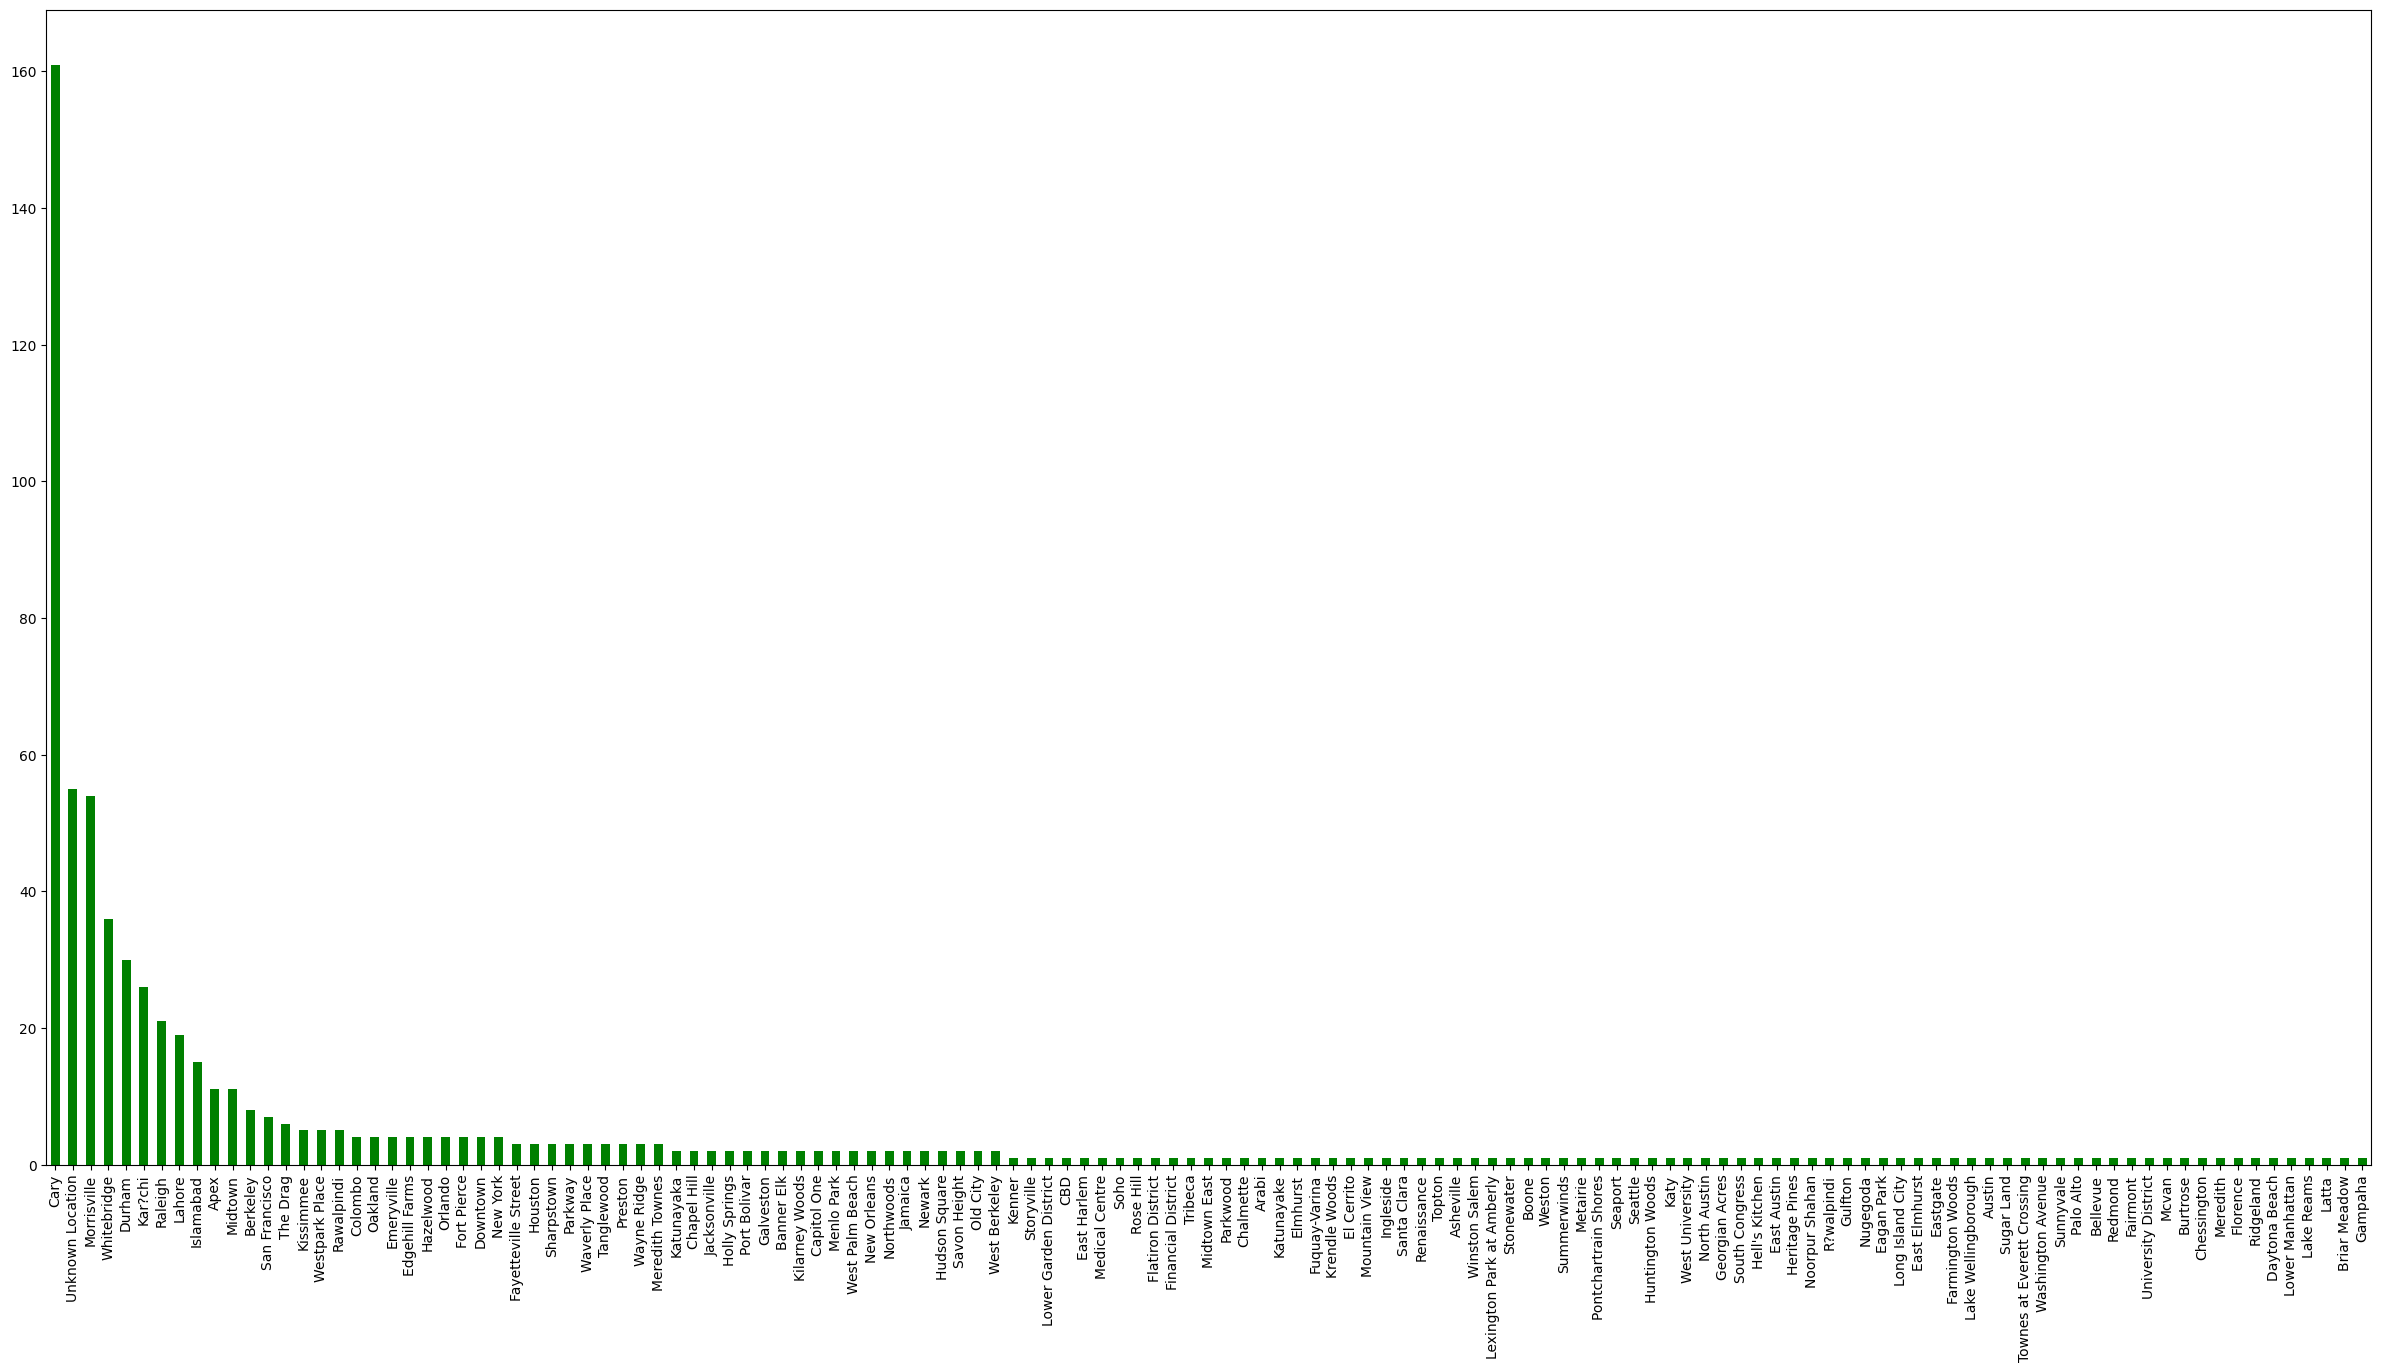

In [27]:
data['START*'].value_counts().plot(kind='bar',figsize=(30,15), color='GREEN')